In [1]:
import pandas as pd
df=pd.read_csv('../data/processed/onewaytime.csv',header=0)

In [2]:
df = df.drop(df.columns[0], axis=1)
# set the display.max_columns option to None
pd.set_option('display.max_columns', None)
df

,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction,weekday,smin,date,time_of_day,daytype
0,07:19:14,GR,0,08:11:50,LES TOURS 01,0.0,3156.0,7,GR-LES TOURS 01,2,19,2023-02-01,Morning,weekday
1,09:21:56,GR,0,10:18:27,LES TOURS 01,0.0,3391.0,9,GR-LES TOURS 01,2,21,2023-02-01,Morning,weekday
2,11:37:38,GR,0,12:42:59,LES TOURS 01,0.0,3921.0,11,GR-LES TOURS 01,2,37,2023-02-01,Morning,weekday
3,13:54:56,GR,0,14:58:49,LES TOURS 01,0.0,3833.0,13,GR-LES TOURS 01,2,54,2023-02-01,Afternoon,weekday
4,16:29:13,GR,0,17:46:02,LES TOURS 01,0.0,4609.0,16,GR-LES TOURS 01,2,29,2023-02-01,Afternoon,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4864,16:48:16,LES TOURS 01,444,17:43:18,GR,444.0,3302.0,16,LES TOURS 01-GR,2,48,2023-03-29,Afternoon,weekday
4865,07:59:13,LES TOURS 01,445,08:46:21,GR,445.0,2828.0,7,LES TOURS 01-GR,3,59,2023-03-30,Morning,weekday
4866,09:46:13,LES TOURS 01,445,10:42:31,GR,445.0,3378.0,9,LES TOURS 01-GR,3,46,2023-03-30,Morning,weekday
4867,11:47:48,LES TOURS 01,445,12:50:56,GR,445.0,3788.0,11,LES TOURS 01-GR,3,47,2023-03-30,Morning,weekday


In [3]:
q1 = df['duration'].quantile(0.10)
q3 = df['duration'].quantile(0.90)
iqr = q3 - q1

df = df[(df['duration'] > q1 - 1.5*iqr) & (df['duration'] < q3 + 1.5*iqr)]


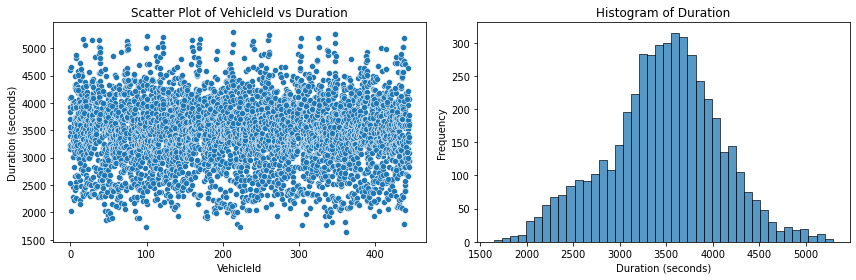

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subplot 1 - Scatter plot of VehicleId vs Duration
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df, x="VehicleId", y="duration", ax=ax1)
ax1.set_title('Scatter Plot of VehicleId vs Duration')
ax1.set_xlabel('VehicleId')
ax1.set_ylabel('Duration (seconds)')

# Subplot 2 - Histogram of Duration
sns.histplot(df['duration'], ax=ax2)
ax2.set_title('Histogram of Duration')
ax2.set_xlabel('Duration (seconds)')
ax2.set_ylabel('Frequency')

# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


In [5]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()

# Convert the 'direction' column to numerical values
df['direction'] = le.fit_transform(df['direction'])
df['stopname'] = le.fit_transform(df['stopname'])
df['stopname1'] = le.fit_transform(df['stopname1'])
df['time_of_day'] = le.fit_transform(df['time_of_day'])
df['daytype'] = le.fit_transform(df['daytype'])
# Convert the date column to a numerical format
df['date'] = pd.to_datetime(df['date']).astype(int)

In [6]:

from sklearn.preprocessing import StandardScaler
import datetime
# Convert the time component to a float
# convert the time columns to datetime objects
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df['time1'] = pd.to_datetime(df['time1'], format='%H:%M:%S')
df['time'] = df['time'].apply(lambda x: float(x.strftime('%H.%M%S')))
df['time1'] = df['time1'].apply(lambda x: float(x.strftime('%H.%M%S')))

# create the scaler object
scaler = StandardScaler()

# define the columns to be scaled
columns_to_scale = ['time','date']

# fit and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [7]:
df

,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction,weekday,smin,date,time_of_day,daytype
0,-1.200784,0,0,8.1150,1,0.0,3156.0,7,0,2,19,-1.726678,1,0
1,-0.640478,0,0,10.1827,1,0.0,3391.0,9,0,2,21,-1.726678,1,0
2,-0.043080,0,0,12.4259,1,0.0,3921.0,11,0,2,37,-1.726678,1,0
3,0.558083,0,0,14.5849,1,0.0,3833.0,13,0,2,54,-1.726678,0,0
4,1.318103,0,0,17.4602,1,0.0,4609.0,16,0,2,29,-1.726678,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4864,1.370779,1,444,17.4318,0,444.0,3302.0,16,1,2,48,1.728351,0,0
4865,-1.090091,1,445,8.4621,0,445.0,2828.0,7,1,3,59,1.790048,1,0
4866,-0.572467,1,445,10.4231,0,445.0,3378.0,9,1,3,46,1.790048,1,0
4867,-0.015123,1,445,12.5056,0,445.0,3788.0,11,1,3,47,1.790048,1,0


In [8]:
features=df.columns
features.drop("duration")

Index(['time', 'stopname', 'VehicleId', 'time1', 'stopname1', 'VehicleId1',
       'shour', 'direction', 'weekday', 'smin', 'date', 'time_of_day',
       'daytype'],
      dtype='object')

In [9]:
X = df[features]
y = df['duration']

In [11]:
from sklearn.decomposition import PCA
# Split the dataset into features and target
X = df.drop('duration', axis=1)
y = df['duration']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [13]:
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, shuffle=True, random_state=42)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

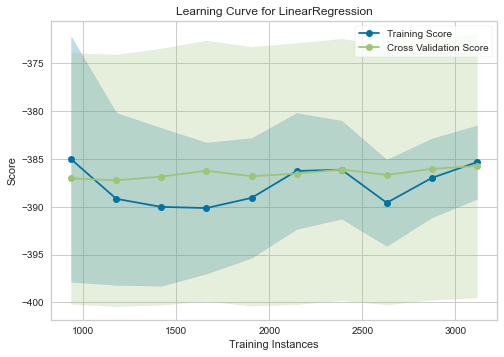

LinearRegression
Best hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Best score:  385.7353168728123
Test MAE: 378.012
Test MAPE: 11.598%
Test RMSE: 486.829
Test R^2: 0.318


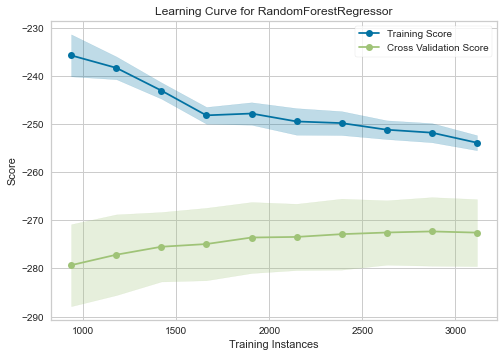

RandomForestRegressor
Best hyperparameters:  {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 1000}
Best score:  272.4002879495464
Test MAE: 263.900
Test MAPE: 7.737%
Test RMSE: 346.893
Test R^2: 0.654


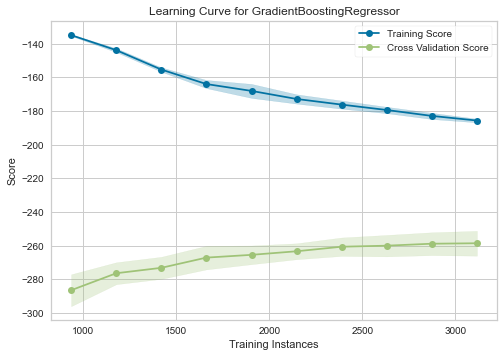

GradientBoostingRegressor
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}
Best score:  258.52422351614075
Test MAE: 253.348
Test MAPE: 7.400%
Test RMSE: 337.424
Test R^2: 0.672


In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from yellowbrick.model_selection import LearningCurve

param_grid_lr = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

param_grid_rfr = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

param_grid_gbr = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1]
}


model_accuracy = {}

# Create a list of tuples containing the models and their respective parameter grids
models = [
    (LinearRegression(), param_grid_lr),
    (RandomForestRegressor(), param_grid_rfr),
    (GradientBoostingRegressor(), param_grid_gbr),
    
]

# Loop through the list of models, and fit each model using GridSearchCV
for model, param_grid in models:
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error' , n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    best_model = grid.best_estimator_
    sizes = np.linspace(0.3, 1.0, 10)
    lc_viz = LearningCurve(best_model, scoring='neg_mean_absolute_error', train_sizes=sizes, n_jobs=-1)
    lc_viz.fit(X_train, y_train)
    lc_viz.show()

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(model.__class__.__name__)
    print("Best hyperparameters: ", grid.best_params_)
    print("Best score: ", -grid.best_score_)
    print("Test MAE: {:.3f}".format(mae))
    print("Test MAPE: {:.3f}%".format(mape*100))
    print("Test RMSE: {:.3f}".format(rmse))
    print("Test R^2: {:.3f}".format(r2))
    print("="*50)


